In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

### total rows and columns

In [3]:
print(df.shape)

(1000, 8)


# Data Cleaning

In [4]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB
None


In [30]:
print(df.describe())

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.165000      69.201000      68.094375
std      14.922414      14.503481      15.068368
min      27.000000      29.000000      25.875000
25%      57.000000      59.000000      57.750000
50%      66.000000      70.000000      69.000000
75%      77.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000


### check any duplicates

In [5]:
print(df.duplicated().sum())

0


### check outliers

<Axes: >

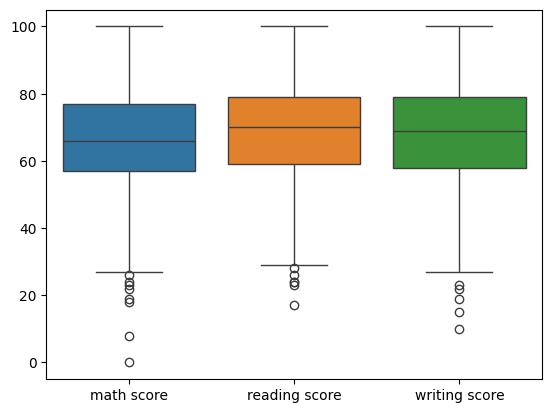

In [6]:
#use boxplot to detect outliers
sns.boxplot(df)

### Outliers are found in math score column reading score column writing score column

### Use IQR method to detect outliers

In [11]:
q1=df['math score'].quantile(0.25)
q3=df['math score'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
outlier=df.loc[(df['math score']>upper)|(df['math score']<lower)]
print(len(outlier))
#Total 8 outliers are found in math score column

8


In [15]:
q1=df['reading score'].quantile(0.25)
q3=df['reading score'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
outlier=df.loc[(df['reading score']>upper)|(df['reading score']<lower)]
print(len(outlier))


6


In [16]:
q1=df['writing score'].quantile(0.25)
q3=df['writing score'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
outlier=df.loc[(df['writing score']>upper)|(df['writing score']<lower)]
print(len(outlier))
#Total 8 outliers are found in math score column

5


### Total 8 outliers are found in math score column
### Total 6 outliers are found in reading score column
### Total 5 outliers are found in writing score column

### Remove outliers using clipping method

In [20]:
q1=df['math score'].quantile(0.25)
q3=df['math score'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
df.loc[df['math score']>upper,'math score']=upper
df.loc[df['math score']<lower,'math score']=lower

In [21]:
q1=df['reading score'].quantile(0.25)
q3=df['reading score'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
df.loc[df['reading score']>upper,'reading score']=upper
df.loc[df['reading score']<lower,'reading score']=lower

In [23]:
q1=df['writing score'].quantile(0.25)
q3=df['writing score'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
df.loc[df['writing score']>upper,'writing score']=upper
df.loc[df['writing score']<lower,'writing score']=lower

<Axes: >

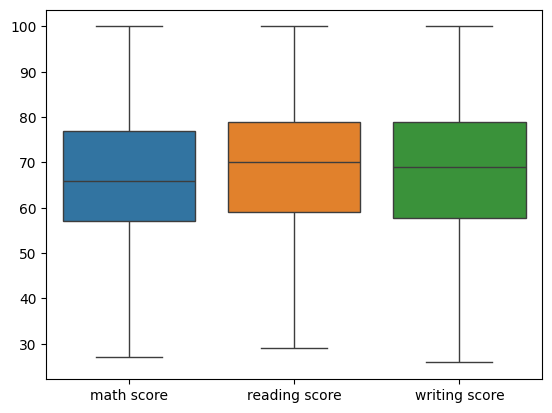

In [24]:
#Outliers are removed
sns.boxplot(df)

# EDA Exploratery Data Analysis

### Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

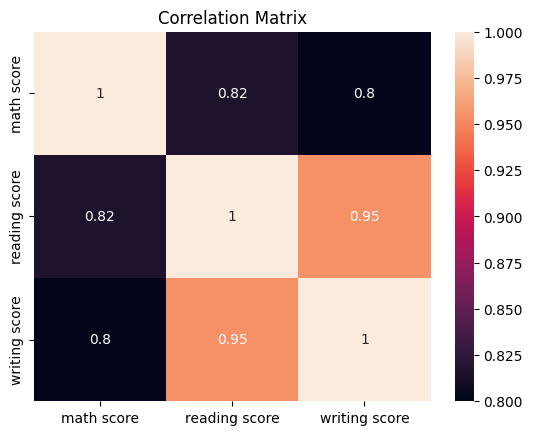

In [28]:
numeric=df.select_dtypes(include='number')
corr=numeric.corr()
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")

### Gender distribuction

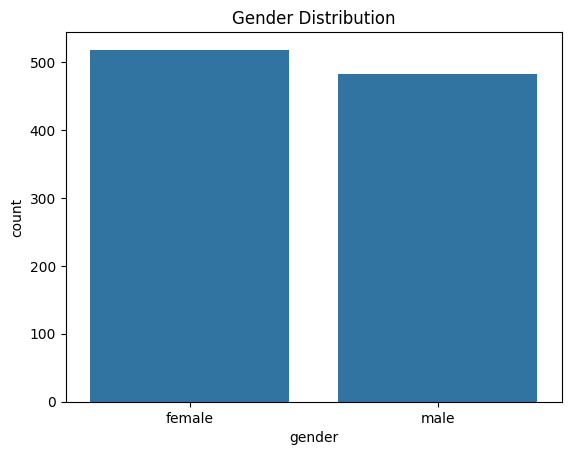

In [33]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_14332\3446812933.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race/ethnicity', data=df, palette='Set3')


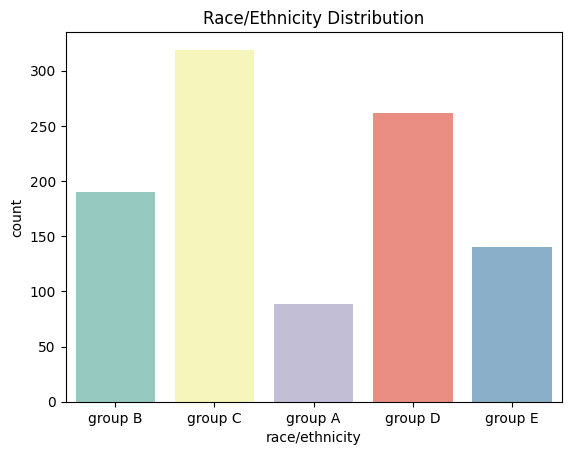

In [34]:
sns.countplot(x='race/ethnicity', data=df, palette='Set3')
plt.title('Race/Ethnicity Distribution')
plt.show()


### Count number of students by parental level of education

In [46]:
total = df.groupby('parental level of education')['gender'].count().reset_index()
total.columns = ['parental level of education', 'count']

print(total)


  parental level of education  count
0          associate's degree    222
1           bachelor's degree    118
2                 high school    196
3             master's degree     59
4                some college    226
5            some high school    179


C:\Users\admin\AppData\Local\Temp\ipykernel_14332\3830781269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parental level of education', data=df, palette='cool')


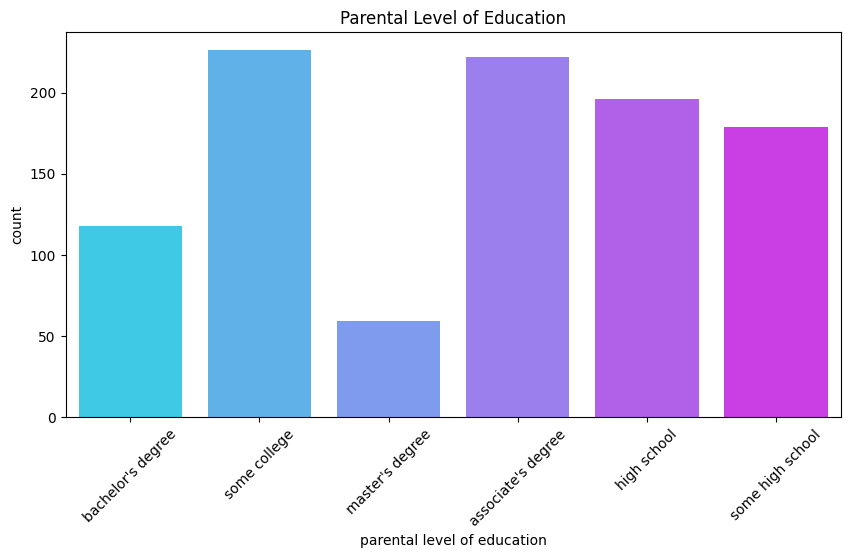

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='parental level of education', data=df, palette='cool')
plt.xticks(rotation=45)
plt.title('Parental Level of Education')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_14332\3926842312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lunch', data=df, palette='pastel')


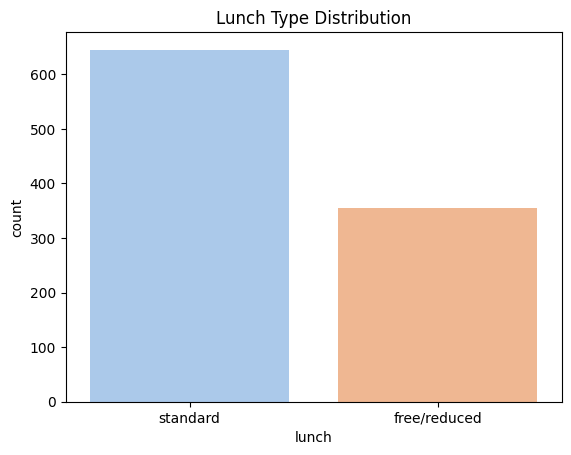

In [48]:
sns.countplot(x='lunch', data=df, palette='pastel')
plt.title('Lunch Type Distribution')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_14332\3410010749.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test preparation course', y='average score', data=df, palette='Set1')


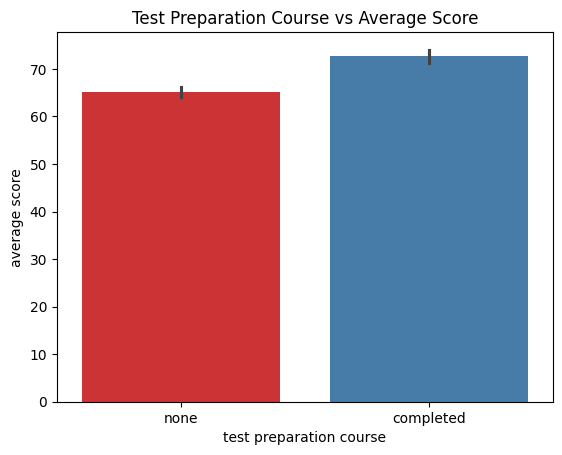

In [53]:
sns.barplot(x='test preparation course', y='average score', data=df, palette='Set1')
plt.title('Test Preparation Course vs Average Score')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_14332\378629130.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='average score', data=df, palette='pastel')


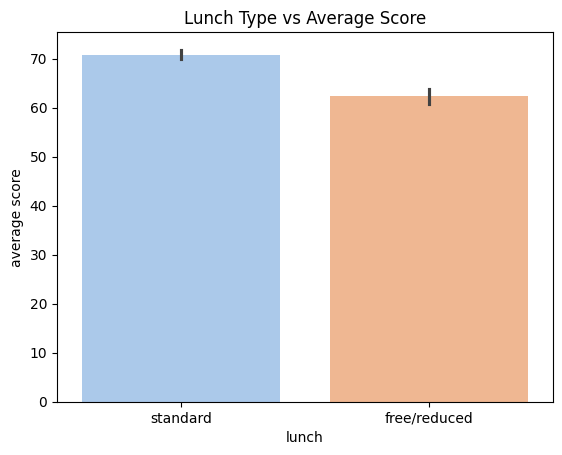

In [54]:
sns.barplot(x='lunch', y='average score', data=df, palette='pastel')
plt.title('Lunch Type vs Average Score')
plt.show()


### Average Score

C:\Users\admin\AppData\Local\Temp\ipykernel_14332\4208814574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='average score', data=df, palette='Set2')


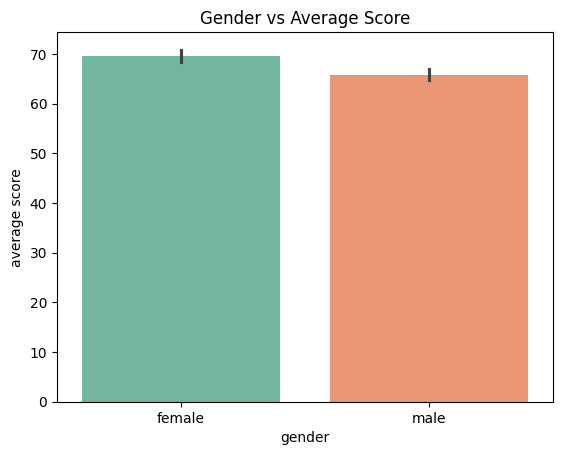

In [51]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
sns.barplot(x='gender', y='average score', data=df, palette='Set2')
plt.title('Gender vs Average Score')
plt.show()


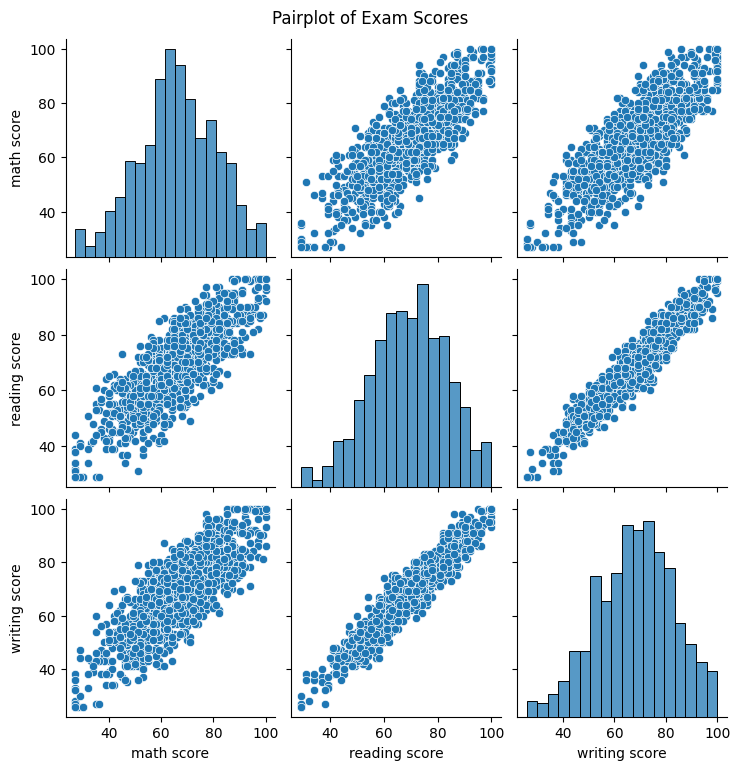

In [57]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle('Pairplot of Exam Scores', y=1.02)
plt.show()


## Relationships between variables and identify patterns/trends

### Summary statistic

In [55]:
print(df.describe())

        math score  reading score  writing score  average score
count  1000.000000    1000.000000    1000.000000    1000.000000
mean     66.165000      69.201000      68.094375      67.820125
std      14.922414      14.503481      15.068368      14.102500
min      27.000000      29.000000      25.875000      27.291667
25%      57.000000      59.000000      57.750000      58.333333
50%      66.000000      70.000000      69.000000      68.333333
75%      77.000000      79.000000      79.000000      77.666667
max     100.000000     100.000000     100.000000     100.000000
